In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/data_mt.csv'
import pandas as pd
df=pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Campaign ID                             Campaign Name  \
0  Campaign 1          SHU_6 (Educators and Principals)   
1  Campaign 1          SHU_6 (Educators and Principals)   
2  Campaign 1          SHU_6 (Educators and Principals)   
3  Campaign 1          SHU_6 (Educators and Principals)   
4  Campaign 2  SHU3_ (Students Apart from India and US)   

                   Audience    Age  \
0  Educators and Principals  25-34   
1  Educators and Principals  35-44   
2  Educators and Principals  45-54   
3  Educators and Principals  55-64   
4                  Students  18-24   

                                           Geography  Reach  Impressions  \
0  Group 1 (Australia, Canada, United Kingdom, Gh...  11387        23283   
1  Group 1 (Australia, Canada, United Kingdom, Gh...   8761        15683   
2  Group 1 (Australia, Canada, United Kingdom, Gh...   2867

In [12]:
col_id=df.columns
print(col_id)


Index(['Campaign ID', 'Campaign Name', 'Audience', 'Age', 'Geography', 'Reach',
       'Impressions', 'Frequency', 'Clicks', 'Unique Clicks',
       'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR)',
       'Unique Click-Through Rate (Unique CTR)', 'Amount Spent in INR',
       'Cost Per Click (CPC)', 'Cost per Result (CPR)'],
      dtype='object')


In [ ]:
camp_name=df['Campaign ID']
print(camp_name)

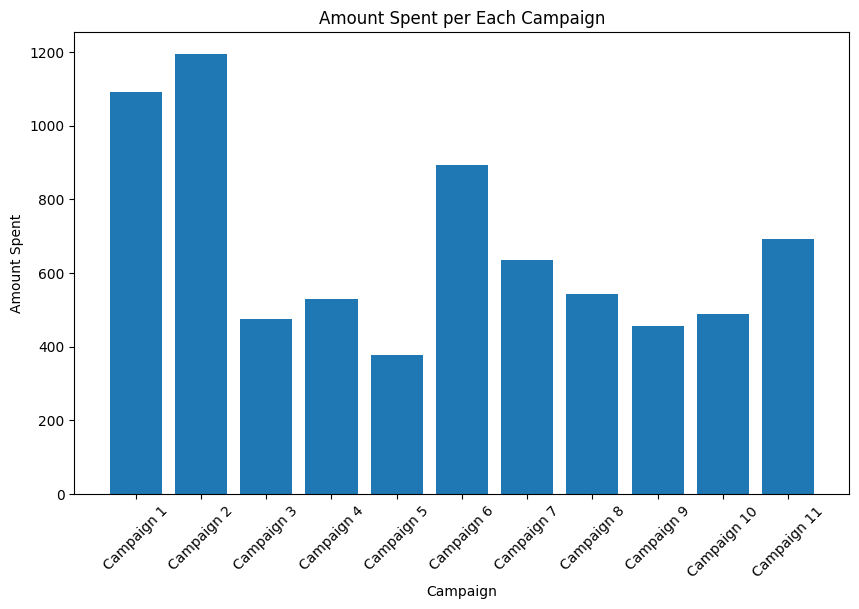

In [3]:
#CAMPAIGN COST
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Campaign ID'], df['Amount Spent in INR'])
plt.xlabel('Campaign')
plt.ylabel('Amount Spent')
plt.title('Amount Spent per Each Campaign')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

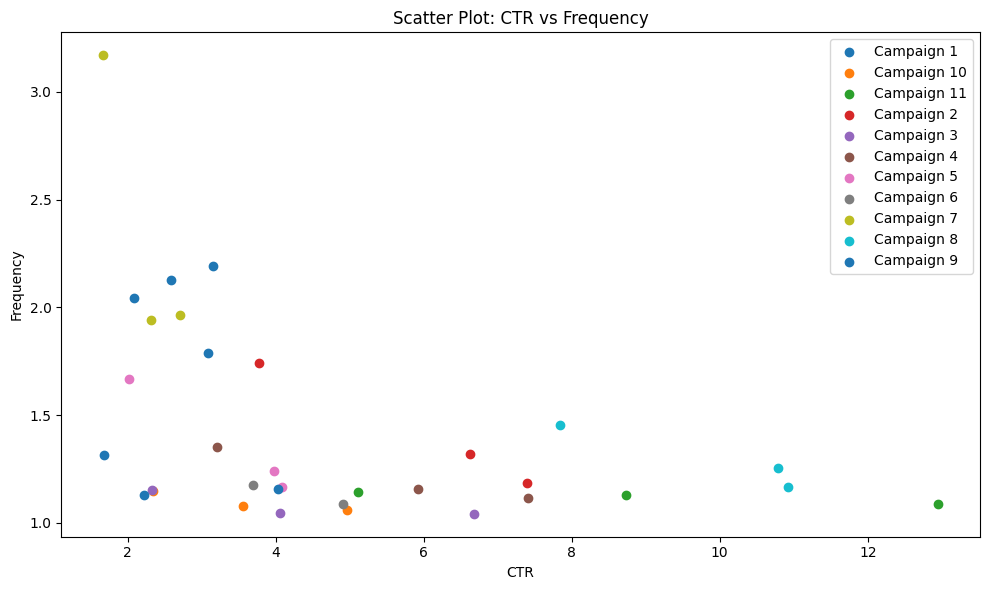

In [ ]:
#RLTNSHP
grouped = df.groupby('Campaign ID')
plt.figure(figsize=(10, 6))
for campaign, group in grouped:
    plt.scatter(group['Click-Through Rate (CTR)'], group['Frequency'], label=campaign)
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.title('Scatter Plot: CTR vs Frequency')
plt.legend()
plt.tight_layout()
plt.show()

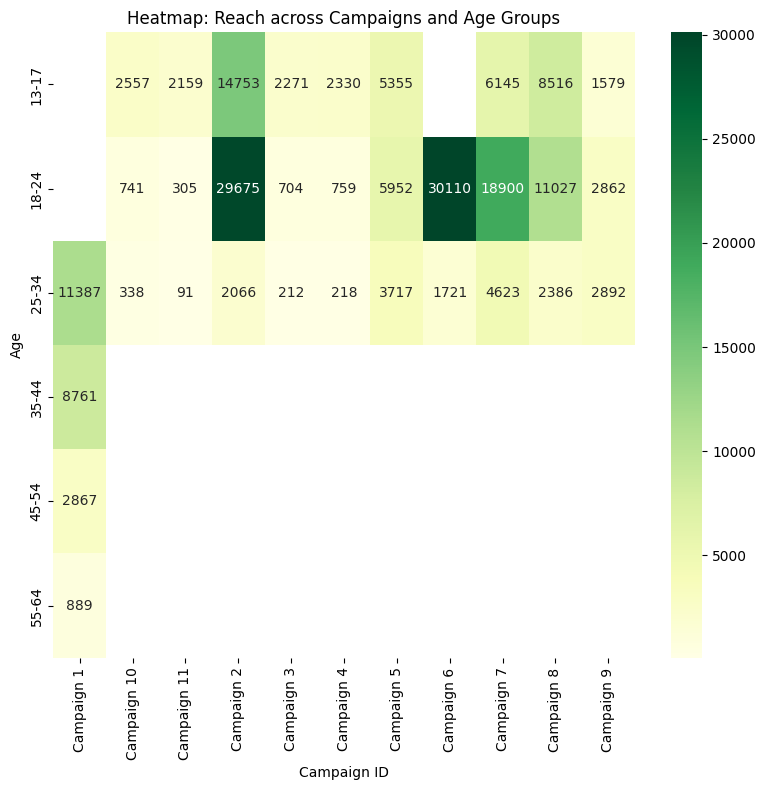

In [11]:
#Heatmap: Reach across Campaigns and Age Groups
import seaborn as sns
plt.figure(figsize=(8,8))
pivot_df = df.pivot_table(index='Age', columns='Campaign ID', values='Reach')

plt.xlabel('Campaign ID')
plt.ylabel('Age Group')
sns.heatmap(data=pivot_df, annot=True, cmap='YlGn', fmt='.0f')
plt.title('Heatmap: Reach across Campaigns and Age Groups')
plt.tight_layout()
plt.show()

In [ ]:
#FINDING OUT WHERE EACH CAMPAIGN HAS ITS INFLUENCE
pivot_df = df.pivot_table(index='Age', columns='Campaign ID', values='Reach')
highest_reach_campaigns = pivot_df.idxmax()
print(highest_reach_campaigns)

Campaign ID
Campaign 1     25-34
Campaign 10    13-17
Campaign 11    13-17
Campaign 2     18-24
Campaign 3     13-17
Campaign 4     13-17
Campaign 5     18-24
Campaign 6     18-24
Campaign 7     18-24
Campaign 8     18-24
Campaign 9     25-34
dtype: object


In [ ]:
#AGE COMPARISON BWN CAMPAIGNS
pivot_df = df.pivot_table(index='Campaign ID', columns='Age', values='Reach')
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Campaign ID')
plt.ylabel('Reach')
plt.title('Stacked Bar Chart: Age Breakdown between Campaigns')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

NameError: ignored

## **From the above inferences, it can be seen that Campaign 3 and Campaign 11 are the least viable campaigns. However, since the amount spent on Campaign 11 is greater than that on Campaign 3, it would be advisable to discontinue Campaign 11 **

---

